In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
pd.set_option('display.max_columns', None)

In [109]:
df = pd.read_csv(r"C:\Users\karth\RealEstatePricePrediction\notebook\cleaned_data\gurgaon_properties_cleaned_v2.csv").drop_duplicates()

In [110]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,4.75,12622.0,3763.0,Super Built up area 3763(349.59 sq.m.),3,5,3+,4.0,West,Relatively New,3763.0,NaN,NaN,0,1,0,0,0,0,42
1,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up...,3,3,3,0.0,North-East,Under Construction,1603.0,1500.0,NaN,0,0,0,0,0,1,66
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,1,49
3,flat,signature global synera,sector 81,0.45,7525.0,598.0,Carpet area: 598 (55.56 sq.m.),2,2,2,6.0,North-East,Relatively New,NaN,NaN,598.0,0,0,1,0,0,0,39
4,house,independent,sector 43,9.85,29638.0,3323.0,Plot area 418(349.5 sq.m.),5,5,2,3.0,West,Old Property,NaN,418.0,NaN,1,1,0,1,0,1,21


In [111]:
df.shape

(3677, 23)

In [112]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

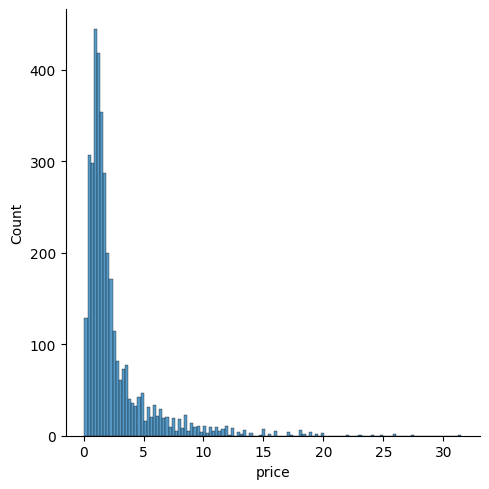

In [113]:
sns.displot(df['price'])

<Axes: xlabel='price'>

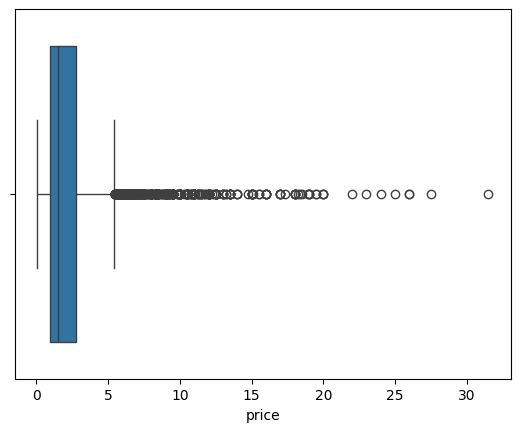

In [114]:
sns.boxplot(x=df['price'])

In [115]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [116]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
555,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
500,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42
511,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
164,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,0,138
387,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
2482,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,0,122
25,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,0,145
1619,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
758,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
1162,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,0,153


#### price col have some genuine outliers but there are some data erros as well

for normally distributed column we using mean +- 3 std and for non normal data we plot box plot

### Price_per_sqft

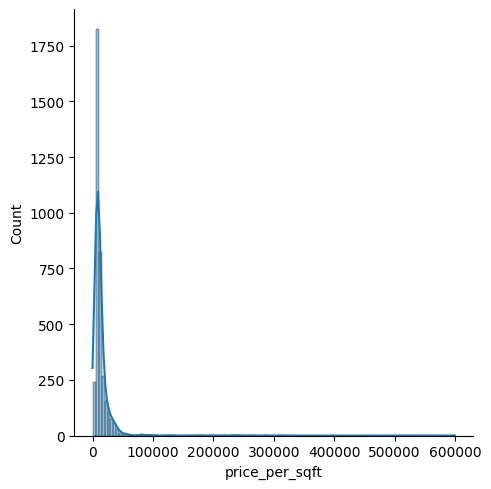

In [117]:
sns.displot(df['price_per_sqft'],kde=True)

<Axes: xlabel='price_per_sqft'>

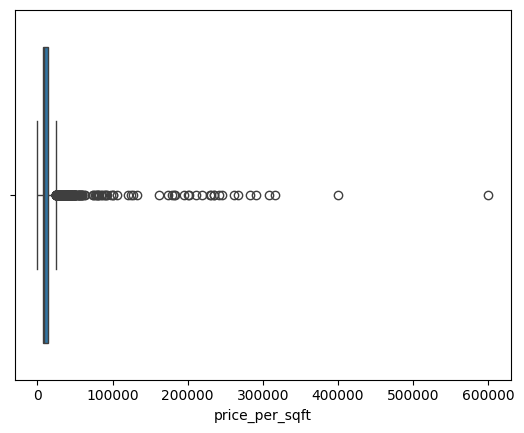

In [118]:
sns.boxplot(x=df['price_per_sqft'])

In [119]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [120]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

In [121]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

In [122]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [123]:
df.update(outliers_sqft)

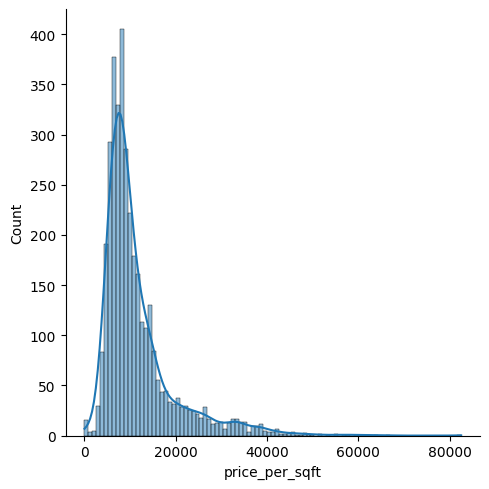

In [124]:
sns.displot(df['price_per_sqft'],kde=True)

<Axes: xlabel='price_per_sqft'>

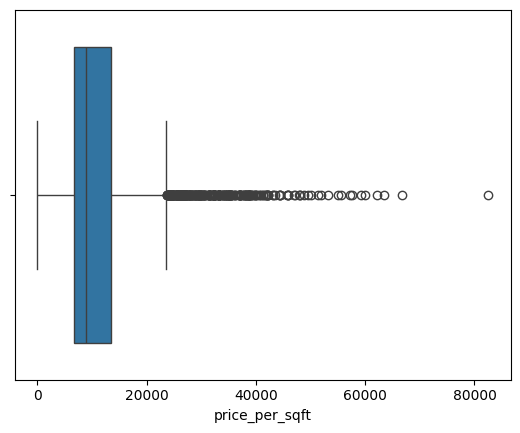

In [125]:
sns.boxplot(x=df['price_per_sqft'])

In [126]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
164,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,0,138
418,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,0,99
511,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
631,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,0,160
1156,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75
1190,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,1,0
1652,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
1912,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,1,0
1914,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,0,72
2052,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,0,103


In [127]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

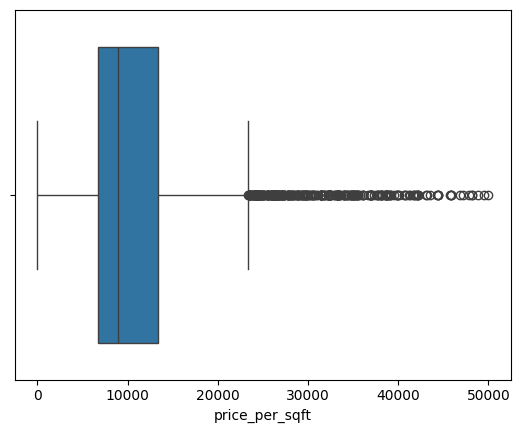

In [128]:
sns.boxplot(x=df['price_per_sqft'])

### Area

<Axes: xlabel='area', ylabel='Density'>

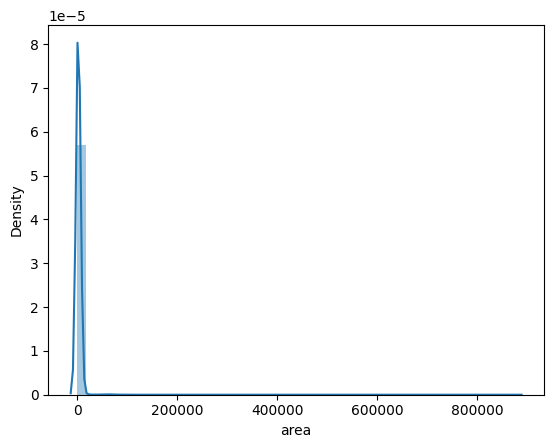

In [129]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

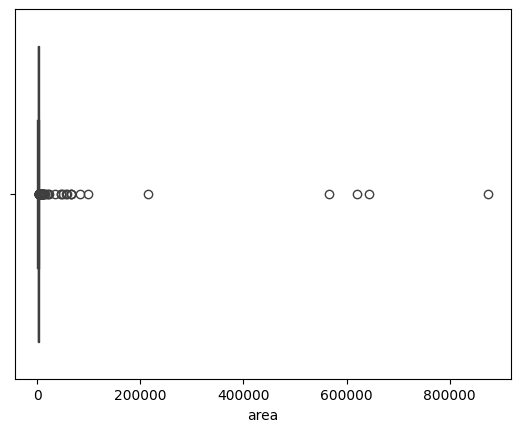

In [130]:
sns.boxplot(x=df['area'])

In [131]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [132]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1036,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,1,76
1037,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
1391,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65
1787,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
2916,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,0,0


In [133]:
df = df[df['area'] < 100000]

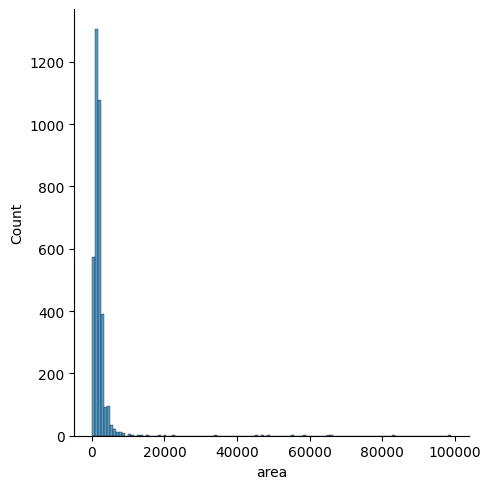

In [134]:
sns.displot(df['area'])

<Axes: xlabel='area'>

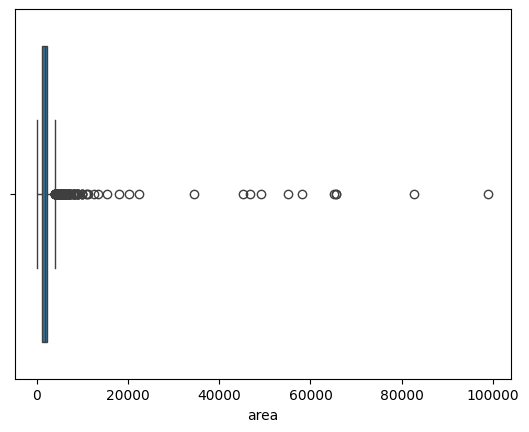

In [135]:
sns.boxplot(x=df['area'])

In [136]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2876,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,0,60
376,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
1331,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
1570,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15
1430,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
65,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
938,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
2229,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
3165,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,0,109
141,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33


In [137]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [138]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2876,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,0,60
376,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
1331,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
1570,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15
1430,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
65,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
938,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
2229,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
3165,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,0,109
141,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33


In [139]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

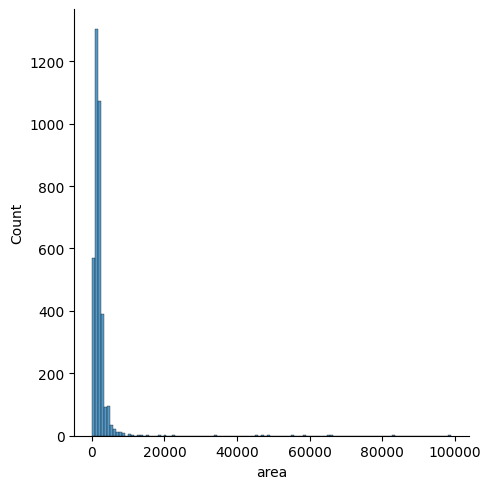

In [140]:
sns.displot(df['area'])

<Axes: xlabel='area'>

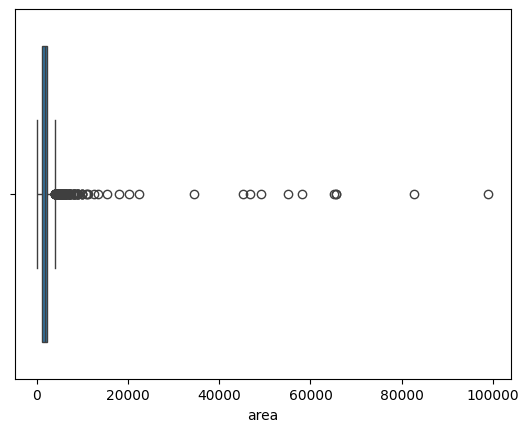

In [141]:
sns.boxplot(x=df['area'])

In [142]:
df['area'].describe()

count     3633.000000
mean      2154.009634
std       3629.442159
min        145.000000
25%       1261.000000
50%       1750.000000
75%       2344.000000
max      98978.000000
Name: area, dtype: float64

### Bedroom

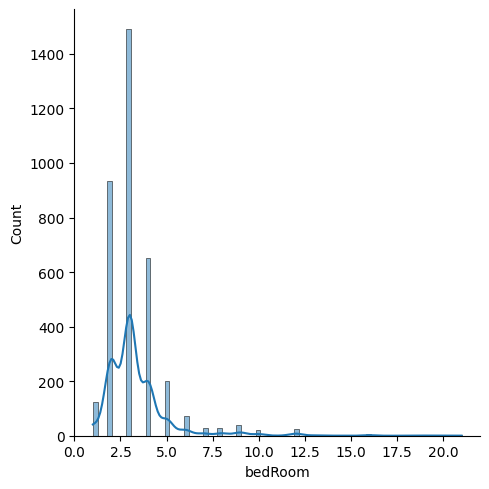

In [143]:
sns.displot(df['bedRoom'],kde=True)  

<Axes: xlabel='bedRoom'>

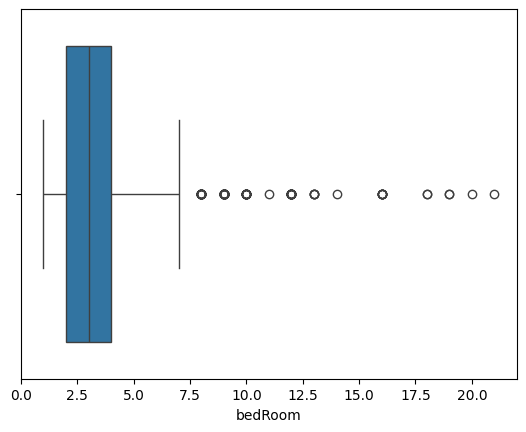

In [144]:
sns.boxplot(x=df['bedRoom'])

In [145]:
df['bedRoom'].describe()

count    3633.000000
mean        3.331957
std         1.831538
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [146]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1898,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
1611,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
283,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,1,68
785,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,1,74
1973,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
1511,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1162,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,0,153
2048,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,1,41
1832,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,0,0
2758,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,0,49


In [147]:
df = df[df['bedRoom'] <= 10]

In [148]:
df.shape

(3588, 23)

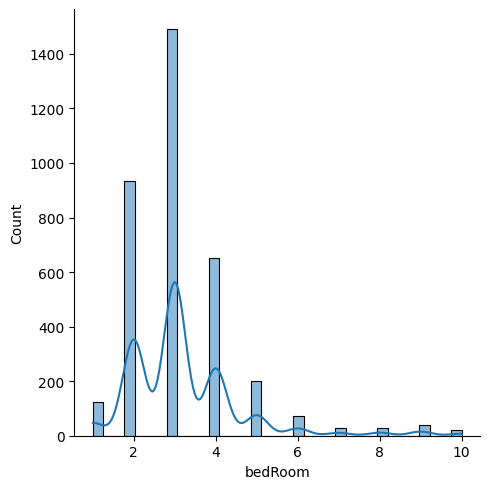

In [149]:
sns.displot(df['bedRoom'],kde=True)

<Axes: xlabel='bedRoom'>

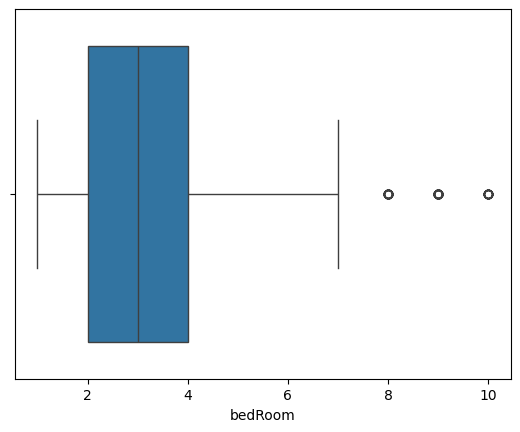

In [150]:
sns.boxplot(x=df['bedRoom'])

In [151]:
df['bedRoom'].describe()

count    3588.000000
mean        3.202062
std         1.395810
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

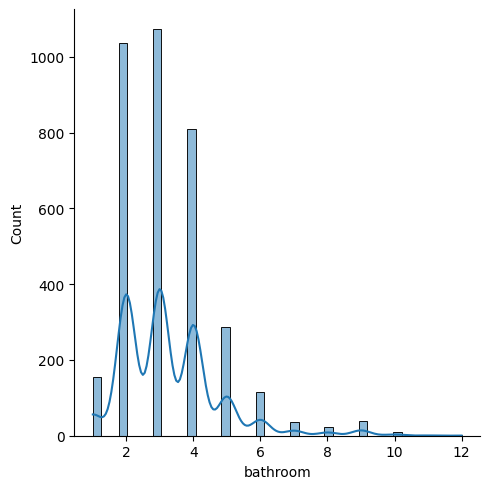

In [152]:
sns.displot(df['bathroom'],kde=True)

<Axes: xlabel='bathroom'>

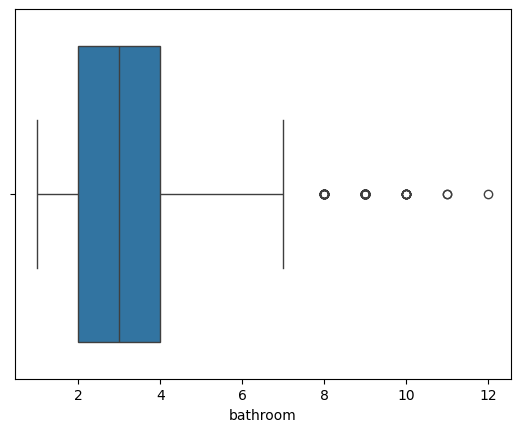

In [153]:
sns.boxplot(x=df['bathroom'])

In [154]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2240,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,0,146
892,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,0,38
3802,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,0,39


In [155]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,4.75,12622.0,3763.0,Super Built up area 3763(349.59 sq.m.),3,5,3+,4.0,West,Relatively New,3763.0,NaN,NaN,0,1,0,0,0,0,42
1,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up...,3,3,3,0.0,North-East,Under Construction,1603.0,1500.0,NaN,0,0,0,0,0,1,66
3,flat,signature global synera,sector 81,0.45,7525.0,598.0,Carpet area: 598 (55.56 sq.m.),2,2,2,6.0,North-East,Relatively New,NaN,NaN,598.0,0,0,1,0,0,0,39
4,house,independent,sector 43,9.85,29642.0,3323.0,Plot area 418(349.5 sq.m.),5,5,2,3.0,West,Old Property,NaN,418.0,NaN,1,1,0,1,0,1,21
5,flat,sare homes,sector 92,0.80,4694.0,1704.0,Carpet area: 1704 (158.31 sq.m.),4,4,3,1.0,North-East,Moderately Old,NaN,NaN,1704.0,0,0,0,0,0,1,77


### super built up area

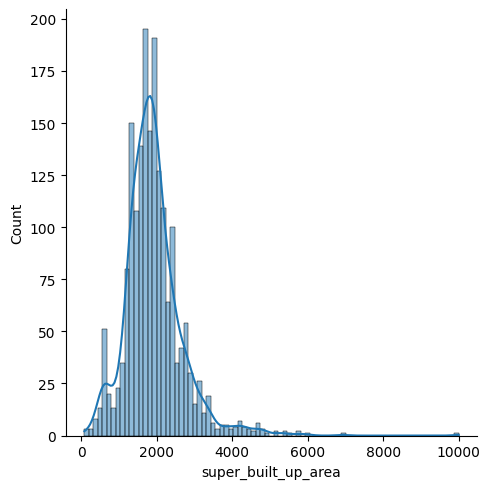

In [156]:
sns.displot(df['super_built_up_area'],kde=True)

<Axes: xlabel='super_built_up_area'>

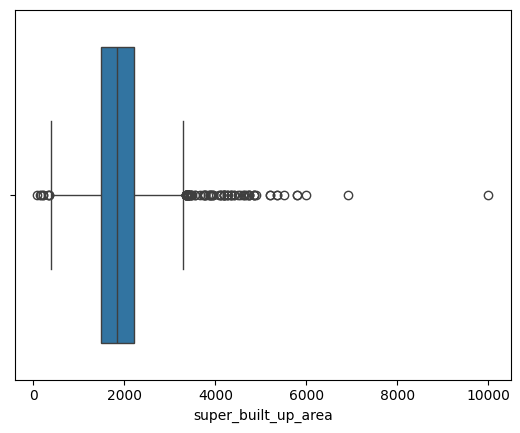

In [157]:
sns.boxplot(x=df['super_built_up_area'])

In [158]:
df['super_built_up_area'].describe()

count     1872.000000
mean      1925.187260
std        764.692379
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [159]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
142,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,1,49
1820,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,0,140


### built up area

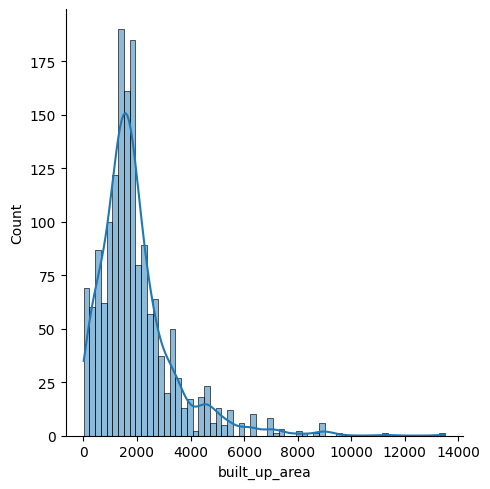

In [160]:
sns.displot(df['built_up_area'],kde=True)

<Axes: xlabel='built_up_area'>

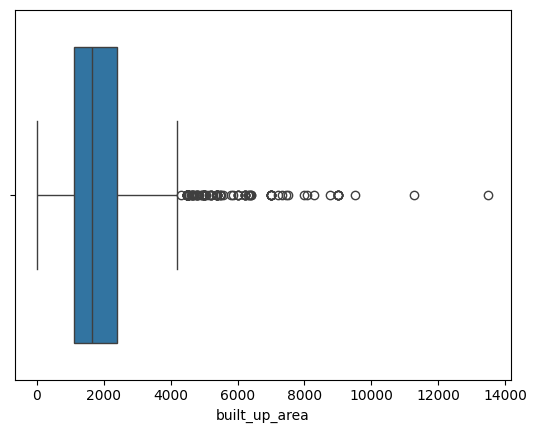

In [161]:
sns.boxplot(x=df['built_up_area'])

In [162]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
500,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42
3735,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,1,0


### carpet area

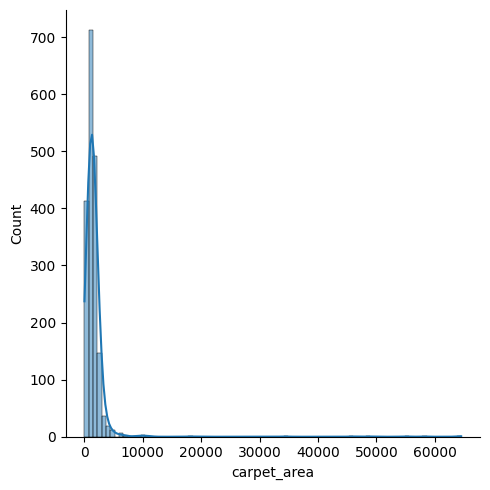

In [163]:
sns.displot(df['carpet_area'],kde=True)

<Axes: xlabel='carpet_area'>

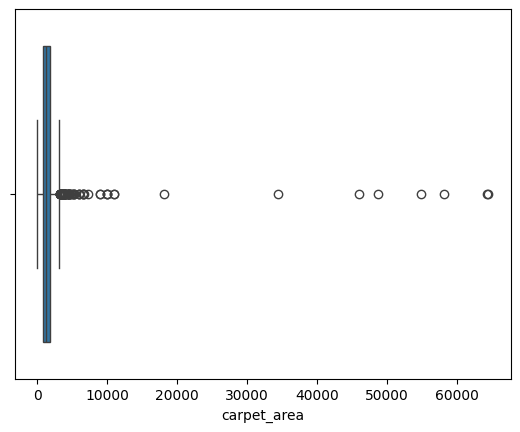

In [164]:
sns.boxplot(x=df['carpet_area'])

In [165]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
65,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,1,15
141,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,1,33
698,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60
938,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,1,37
1331,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,1,51
1570,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,1,15
1788,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,0,44
2229,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,1,37
2876,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,0,60
3340,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,1,68


In [166]:
df.loc[2131,'carpet_area'] = 1812

In [167]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
65,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,1,15
141,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0,0,0,0,1,1,33
698,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60
938,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,1,37
1331,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.0,0,0,0,0,0,1,51
1570,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.0,1,0,0,0,0,1,15
1788,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,0,44
2229,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,1,37
2876,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,0,60
3340,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,1,68


In [168]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,4.75,12622.0,3763.0,Super Built up area 3763(349.59 sq.m.),3,5,3+,4.0,West,Relatively New,3763.0,NaN,NaN,0,1,0,0,0,0,42
1,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up...,3,3,3,0.0,North-East,Under Construction,1603.0,1500.0,NaN,0,0,0,0,0,1,66
3,flat,signature global synera,sector 81,0.45,7525.0,598.0,Carpet area: 598 (55.56 sq.m.),2,2,2,6.0,North-East,Relatively New,NaN,NaN,598.0,0,0,1,0,0,0,39
4,house,independent,sector 43,9.85,29642.0,3323.0,Plot area 418(349.5 sq.m.),5,5,2,3.0,West,Old Property,NaN,418.0,NaN,1,1,0,1,0,1,21
5,flat,sare homes,sector 92,0.80,4694.0,1704.0,Carpet area: 1704 (158.31 sq.m.),4,4,3,1.0,North-East,Moderately Old,NaN,NaN,1704.0,0,0,0,0,0,1,77


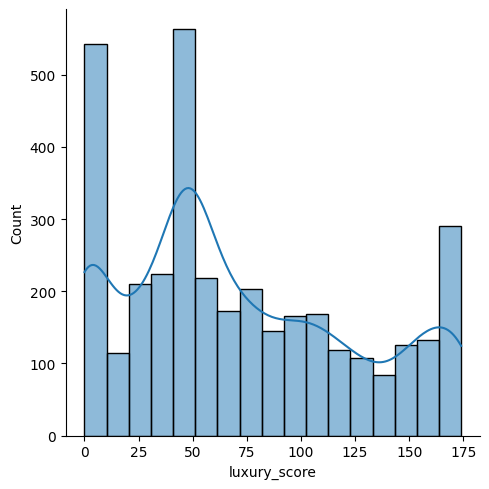

In [169]:
sns.displot(df['luxury_score'],kde=True)

<Axes: ylabel='luxury_score'>

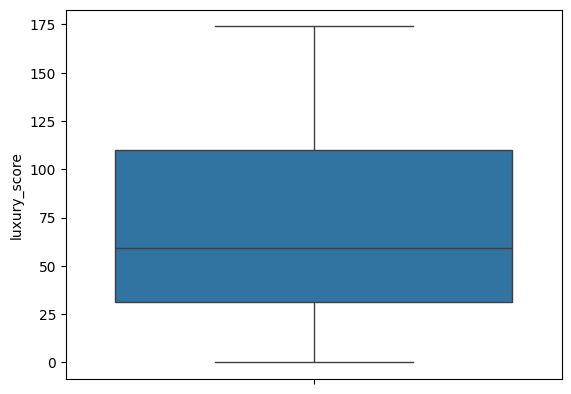

In [170]:
sns.boxplot(df['luxury_score'])

In [171]:
df.shape

(3588, 23)

In [172]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [173]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,4.75,12623.0,3763.0,Super Built up area 3763(349.59 sq.m.),3,5,3+,4.0,West,Relatively New,3763.0,NaN,NaN,0,1,0,0,0,0,42
1,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up...,3,3,3,0.0,North-East,Under Construction,1603.0,1500.0,NaN,0,0,0,0,0,1,66
3,flat,signature global synera,sector 81,0.45,7525.0,598.0,Carpet area: 598 (55.56 sq.m.),2,2,2,6.0,North-East,Relatively New,NaN,NaN,598.0,0,0,1,0,0,0,39
4,house,independent,sector 43,9.85,29642.0,3323.0,Plot area 418(349.5 sq.m.),5,5,2,3.0,West,Old Property,NaN,418.0,NaN,1,1,0,1,0,1,21
5,flat,sare homes,sector 92,0.80,4695.0,1704.0,Carpet area: 1704 (158.31 sq.m.),4,4,3,1.0,North-East,Moderately Old,NaN,NaN,1704.0,0,0,0,0,0,1,77


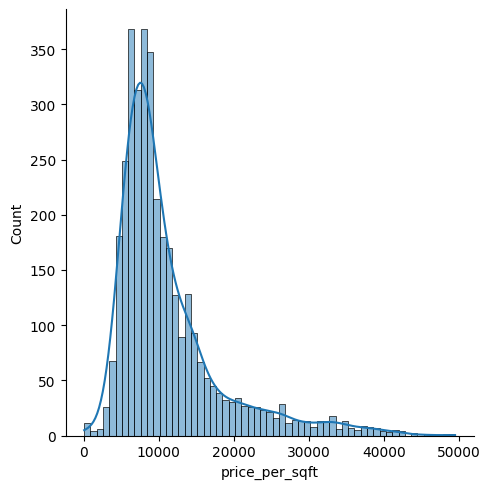

In [174]:
sns.displot(df['price_per_sqft'],kde=True)

<Axes: ylabel='price_per_sqft'>

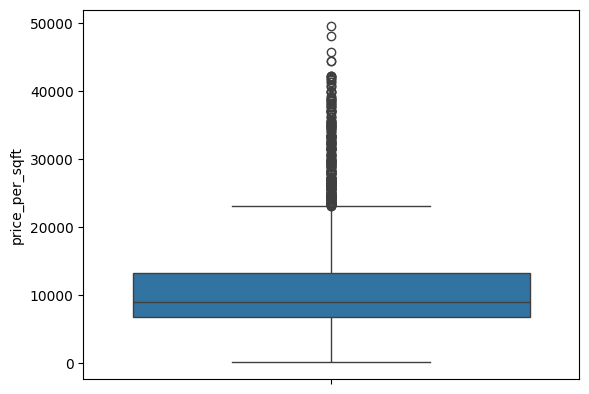

In [175]:
sns.boxplot(df['price_per_sqft'])

In [176]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
758,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
998,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
1432,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,0,44
1558,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,0,88
2032,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,0,103
2691,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,0,121
3168,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,1,0
3653,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,0,7
3799,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,0,60


In [177]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

np.float64(189.14400000000003)

In [178]:
df[(df['area']/df['bedRoom'])<189]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
131,house,independent,sector 2,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9,9,3+,3.0,West,New Property,NaN,1557.0,NaN,0,1,0,1,0,0,116
189,house,independent,sector 2,1.00,8230.0,1215.0,Plot area 135(112.88 sq.m.),9,7,3+,3.0,North,Moderately Old,NaN,1215.0,NaN,0,0,0,1,0,1,0
203,house,independent,sector 38,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),7,7,3+,3.0,North-East,Relatively New,NaN,900.0,NaN,1,0,1,1,0,1,27
227,house,prem kunj,sohna road road,0.50,7407.0,675.0,Plot area 675(62.71 sq.m.)Built Up area: 725 s...,5,4,3,3.0,South-West,Relatively New,NaN,725.0,675.0,0,0,0,1,0,1,22
239,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4,4,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,house,bhawani enclave,sector 12,0.42,8235.0,510.0,Plot area 565(52.49 sq.m.)Carpet area: 510 sq....,3,3,0,2.0,East,New Property,NaN,NaN,510.0,0,0,0,1,0,1,0
3615,house,independent,sector 13,0.90,11465.0,785.0,Plot area 785(72.93 sq.m.),5,4,3,3.0,North-West,Moderately Old,NaN,785.0,NaN,1,1,0,1,1,1,0
3633,house,independent,sohna road road,1.20,22305.0,538.0,Plot area 50,4,4,3+,4.0,West,Old Property,NaN,535.0,NaN,0,0,0,0,0,1,8
3775,house,independent,sector 4,0.50,10482.0,477.0,Built Up area: 53 (44.31 sq.m.),5,3,0,1.0,NaN,Undefined,NaN,53.0,NaN,0,0,0,0,0,1,0


In [179]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(257.0)

In [180]:
df[(df['area']/df['bedRoom'])<257]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
21,flat,signature global solera,sector 107,0.28,5622.0,498.0,Carpet area: 489 (45.43 sq.m.),2,2,2,14.0,North-West,Relatively New,NaN,NaN,489.000000,0,0,0,0,0,1,38
45,flat,signature global solera,sector 107,0.50,7752.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,North-East,Relatively New,NaN,NaN,645.000000,0,0,0,0,1,1,49
71,flat,signature global solera,sector 107,0.28,5833.0,480.0,Carpet area: 489 (45.43 sq.m.),2,2,2,11.0,South,Relatively New,NaN,NaN,489.000000,0,0,0,0,0,1,45
78,flat,gls avenue 51,sector 92,0.50,7812.0,640.0,Super Built up area 640(59.46 sq.m.),3,3,1,0.0,NaN,Relatively New,640.0,NaN,NaN,0,0,0,0,0,1,0
131,house,independent,sector 2,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9,9,3+,3.0,West,New Property,NaN,1557.0,NaN,0,1,0,1,0,0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,house,independent,sector 6,1.25,11574.0,1080.0,Plot area 120(100.34 sq.m.)Built Up area: 120 ...,5,5,1,2.0,South,New Property,NaN,120.0,NaN,0,0,0,1,0,1,0
3755,flat,mvn athens,sohna road,0.26,5394.0,482.0,Carpet area: 481.74 (44.76 sq.m.),2,2,1,2.0,NaN,Relatively New,NaN,NaN,481.792164,0,0,0,0,0,1,37
3775,house,independent,sector 4,0.50,10482.0,477.0,Built Up area: 53 (44.31 sq.m.),5,3,0,1.0,NaN,Undefined,NaN,53.0,NaN,0,0,0,0,0,1,0
3793,house,shri shyam residency,sector 104,0.62,12400.0,500.0,Plot area 500(46.45 sq.m.)Built Up area: 900 s...,3,3,1,2.0,NaN,Moderately Old,NaN,900.0,480.000000,0,0,0,0,1,2,8


Less Area ,More Rooms not logical.ratio high means more rooms in less area.
- First guess is they are plots and built over and individual houses.
- multi storey houses.eg. 3 floors with 2 rooms each floor means 6 room

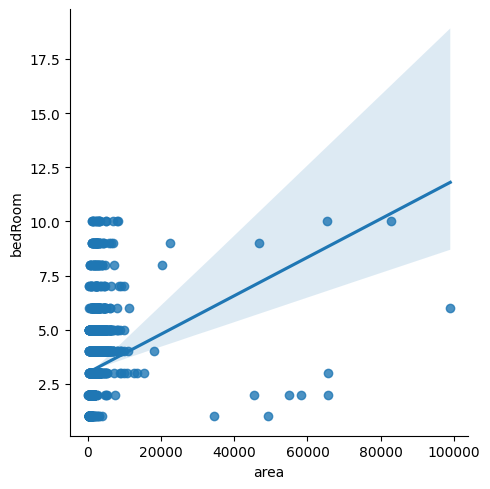

In [181]:
sns.lmplot(data = df,x="area",y="bedRoom")

In [182]:
df["area_room_ratio"] = df["area"]/df["bedRoom"]

In [183]:
(df[df["area_room_ratio"]<257])['bedRoom'].value_counts()

bedRoom
2     54
3     38
5     28
6     18
4     16
9     15
8     12
7      8
10     7
1      1
Name: count, dtype: int64

In [184]:
outlier_df = df[(df['area_room_ratio']<257) & (df['bedRoom']>3)]

In [185]:
outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])

In [186]:
df.update(outlier_df)

In [187]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [188]:
df[(df['area_room_ratio']<257) & (df['bedRoom']>4)].shape

(15, 24)

In [194]:
df.shape

(3573, 24)

In [192]:
df=df[~((df['area_room_ratio']<257) & (df['bedRoom']>4))]

In [195]:
df.shape

(3573, 24)

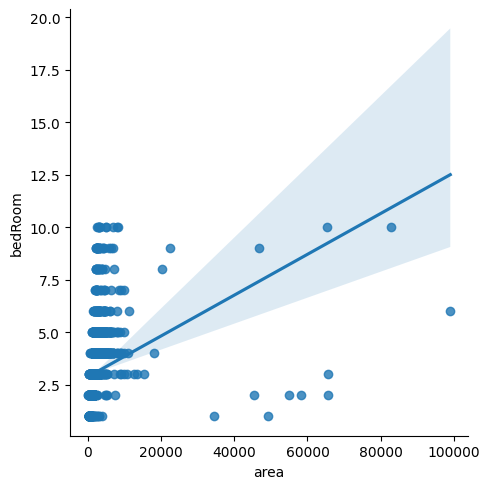

In [196]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [197]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,experion windchants,sector 112,4.75,12623.0,3763.0,Super Built up area 3763(349.59 sq.m.),3,5,3+,4.0,West,Relatively New,3763.0,NaN,NaN,0,1,0,0,0,0,42,1254.333333
1,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up...,3,3,3,0.0,North-East,Under Construction,1603.0,1500.0,NaN,0,0,0,0,0,1,66,534.333333
3,flat,signature global synera,sector 81,0.45,7525.0,598.0,Carpet area: 598 (55.56 sq.m.),2,2,2,6.0,North-East,Relatively New,NaN,NaN,598.0,0,0,1,0,0,0,39,299.000000
4,house,independent,sector 43,9.85,29642.0,3323.0,Plot area 418(349.5 sq.m.),5,5,2,3.0,West,Old Property,NaN,418.0,NaN,1,1,0,1,0,1,21,664.600000
5,flat,sare homes,sector 92,0.80,4695.0,1704.0,Carpet area: 1704 (158.31 sq.m.),4,4,3,1.0,North-East,Moderately Old,NaN,NaN,1704.0,0,0,0,0,0,1,77,426.000000


In [198]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)